**Creating a Time-series Model**

**Introduction**
The focus will be on creating a time series model.
 Time series analysis aims to identify patterns in the data, model these patterns, and use the model to make accurate predictions about future values.It uses mathematical models and statistical methods to extract insights from time-ordered data. 
 In this project we have the craigslist_csv which has data on used cars in craigslist site in the US.Read it,cleanit and explore it using various visualizations and statistical analysis techniques. In order to understand temporal patterns, identifying seasonal trends, and analyzing demand-supply dynamics by region and vehicle type. Most of the research was done from google.  

In [4]:
# load packages
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv


In [5]:
 from subprocess import check_output
print(check_output(["ls", "../input/craigslist-vehicles/"]).decode("utf8"))

craigslist_vehicles.csv



In [6]:
# read the file

df = pd.read_csv("../input/craigslist-vehicles/craigslist_vehicles.csv")
df.head(4)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00


In [7]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [8]:
# Check for dupicates in the dataset
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

There are no duplicates in the dataframe

In [9]:
# get the total missing values in columns
print(df.isnull().sum())

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64


*We have rows with missing values*

In [10]:
# drop columns we wont be using
df.drop(columns=['Unnamed: 0','url','region_url','image_url','lat','long','county','size','type'], inplace=True)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,paint_color,description,state,posting_date,removal_date
0,7307679724,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,7311833696,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,7311441996,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,NaN,fwd,silver,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,7307680715,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,7311834578,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,clean,automatic,NaN,NaN,NaN,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [11]:
# get the total missing values in columns
print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
paint_color     130203
description         70
state                0
posting_date        68
removal_date        68
dtype: int64


In [12]:
#replacing the categorical column to have a huge dataframe 

df['paint_color'].fillna((df['paint_color'].value_counts().index[0]), inplace=True)
df['manufacturer'].fillna((df['manufacturer'].value_counts().index[0]), inplace=True)
df['condition'].fillna((df['condition'].value_counts().index[0]), inplace=True)
df['cylinders'].fillna((df['cylinders'].value_counts().index[0]), inplace=True)
df['VIN'].fillna((df['VIN'].value_counts().index[0]), inplace=True)
df['drive'].fillna((df['drive'].value_counts().index[0]), inplace=True)
df['paint_color'].fillna((df['paint_color'].value_counts().index[0]), inplace=True)

df.reset_index()
df.head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,paint_color,description,state,posting_date,removal_date
0,7307679724,abilene,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,white,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,7311833696,abilene,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,white,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,7311441996,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,1FMJU1JT1HEA52352,fwd,silver,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00


In [13]:
# get the total missing values in columns
print(df.isnull().sum())

id                 0
region             0
price              0
year            1205
manufacturer       0
model           5277
condition          0
cylinders          0
fuel            3013
odometer        4400
title_status    8242
transmission    2556
VIN                0
drive              0
paint_color        0
description       70
state              0
posting_date      68
removal_date      68
dtype: int64


In [14]:
# drop the rows with missing values in data frame
df.dropna(inplace=True)

In [15]:
# get the total missing values in columns
print(df.isnull().sum())

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
paint_color     0
description     0
state           0
posting_date    0
removal_date    0
dtype: int64


We have no missing values now

In [16]:
# getting datatypes for the dataframe
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
paint_color      object
description      object
state            object
posting_date     object
removal_date     object
dtype: object

In [17]:
# converted necessary columns to datetime so that it can be recognised by python as date
df["removal_date"]= df["removal_date"].apply(pd.to_datetime)
df["posting_date"]= df["posting_date"].apply(pd.to_datetime)

In [18]:
df.dtypes

id                            int64
region                       object
price                         int64
year                        float64
manufacturer                 object
model                        object
condition                    object
cylinders                    object
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
VIN                          object
drive                        object
paint_color                  object
description                  object
state                        object
posting_date    datetime64[ns, UTC]
removal_date    datetime64[ns, UTC]
dtype: object

**Exploratory Data Analysis**
The dataframe being very huge before I did any time series analysis did EDA first to understand the features in the dataframe.

**Univarite plots**

Text(0.5, 1.0, 'Count plot for the condition of the cars')

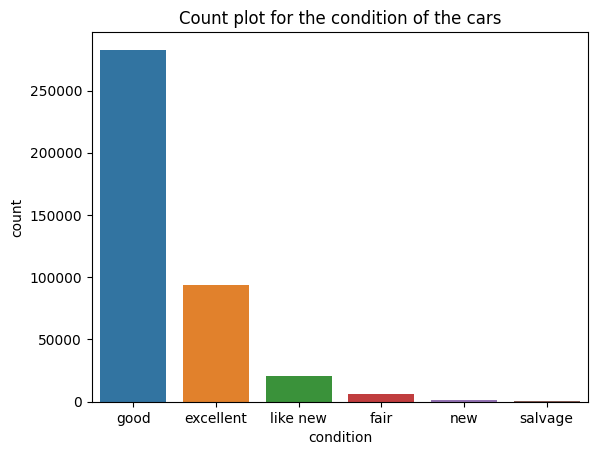

In [19]:
# A count plot for contion of cars
ax = sns.countplot(
                   x="condition", 
                   data=df) 
# Set title
plt.title("Count plot for the condition of the cars") 

we can see in descending order the condition ofthe cars with most cars being good in condiiton while salvage condition being the least

Text(0.5, 1.0, 'Count plot for the condition of the fuel')

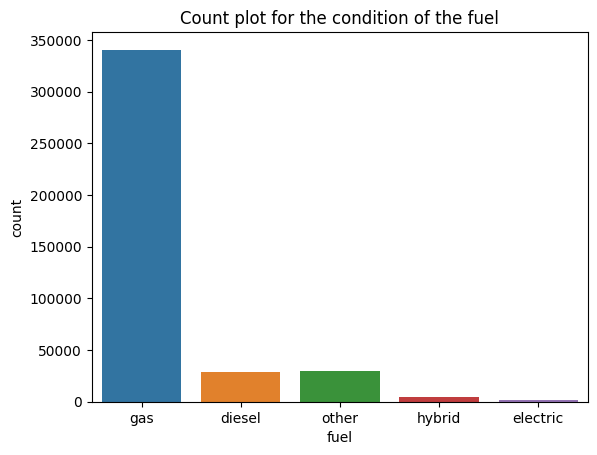

In [20]:
# count pot for fuel
ax = sns.countplot(
                   x="fuel", 
                   data=df) 
# Set title
plt.title("Count plot for the condition of the fuel")

We have the fuel type used by the cars in descending order with gas cars being the most on craigs list

Text(0.5, 1.0, 'Count plot for the condition of the drive')

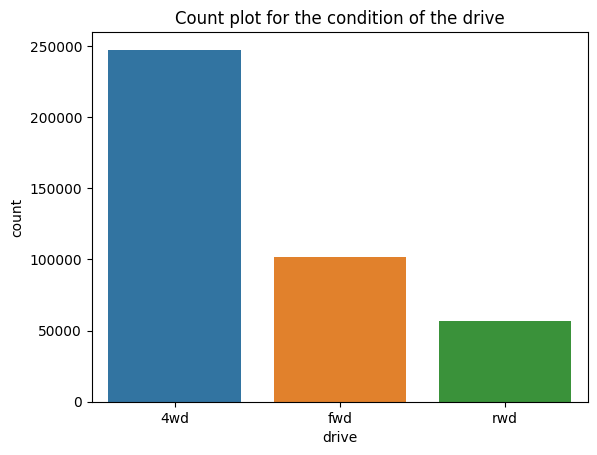

In [21]:
# countplot for drive
ax = sns.countplot(
                   x="drive", 
                   data=df) 
# Set title
plt.title("Count plot for the condition of the drive")

we have the top 3 drive types on craigs list with 4wd drive being the top

Text(0.5, 1.0, 'Count plot for the condition of the transmission')

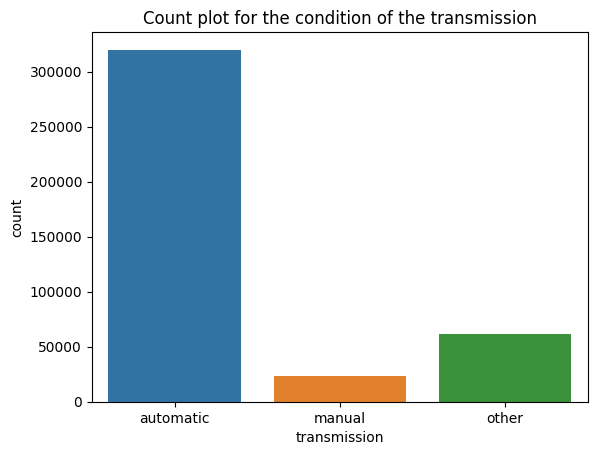

In [22]:
# count plot for transmission
ax = sns.countplot(
                   x="transmission", 
                   data=df) 
# Set title
plt.title("Count plot for the condition of the transmission")

Automatic transmission cars are the most on craigs list

Text(0.5, 1.0, 'Count plot for the condition of the status')

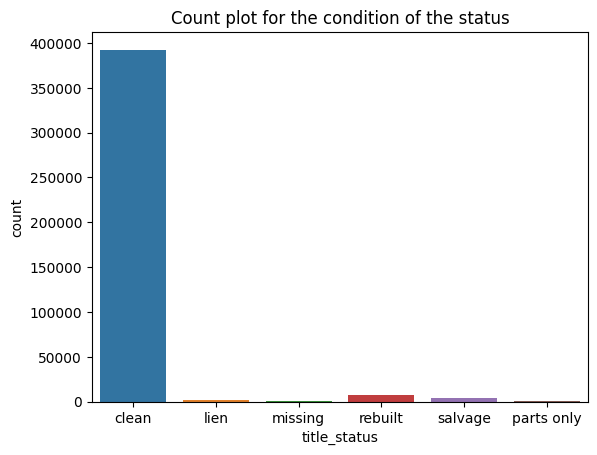

In [23]:
# count plot for title status
ax = sns.countplot(
                   x="title_status", 
                   data=df) 
# Set title
plt.title("Count plot for the condition of the status")

Most cars on craigslist's status is clean

Text(0.5, 1.0, 'Count plot for the condition of the cars')

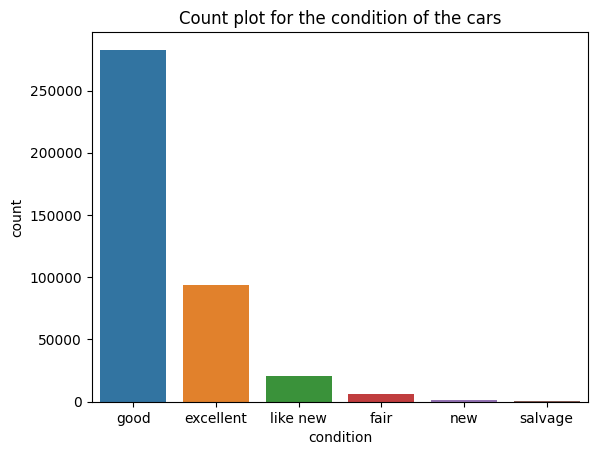

In [24]:
# count plot for condition
ax = sns.countplot(
                   x="condition", 
                   data=df) 
# Set title
plt.title("Count plot for the condition of the cars")

Most cars are in good condition

Text(0.5, 1.0, 'Price against year')

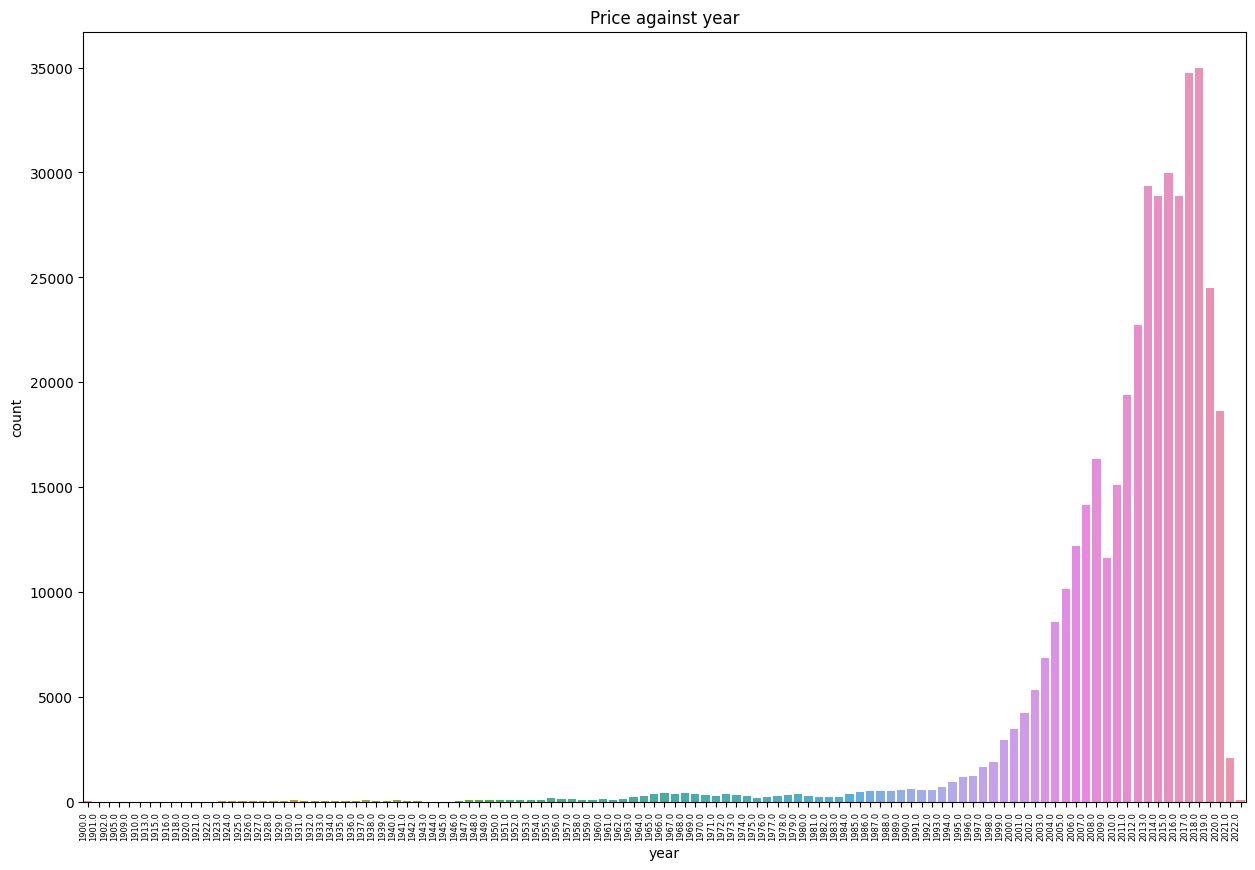

In [25]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);
# Set title
plt.title("Price against year")

Prices started increasing from 1982 a sharp rise from 1992 which spikedtill 2018 and started slowly tanking till 2022 

/tmp/ipykernel_32/2943672519.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);


Text(0.5, 1.0, 'Top 20 manufacurers')

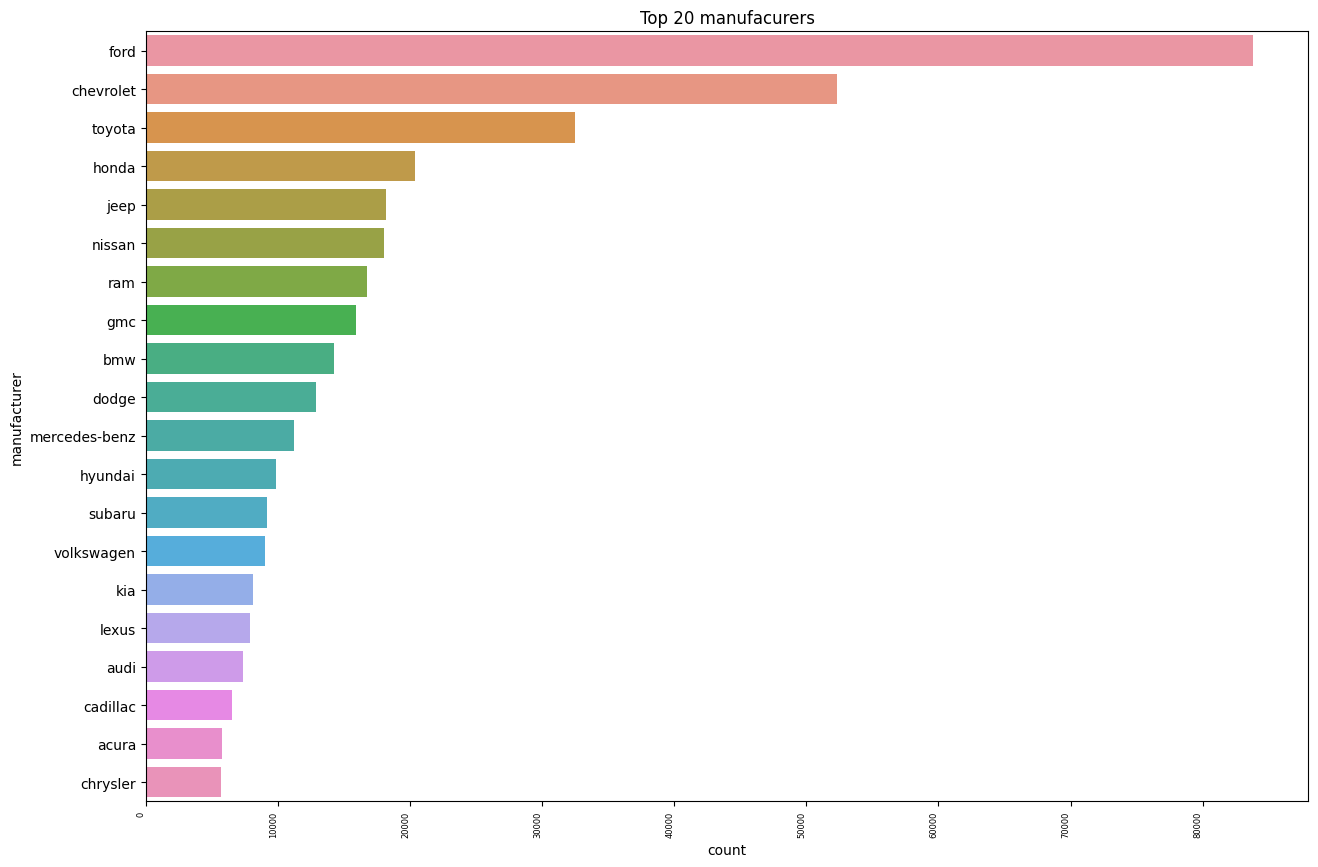

In [26]:
# plot the top 20 manufacturers

manufacturers_1 = df['manufacturer'].value_counts().iloc[:20]
manufacturers = pd.DataFrame({'manufacturer': manufacturers_1.index, 'count': manufacturers_1.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(y='manufacturer',x='count',data=manufacturers, order=manufacturers['manufacturer']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

# Set title
plt.title("Top 20 manufacurers")

Cars from ford manufacturer are the most on craigslist

/tmp/ipykernel_32/366633137.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);


Text(0.5, 1.0, 'Top 20 models')

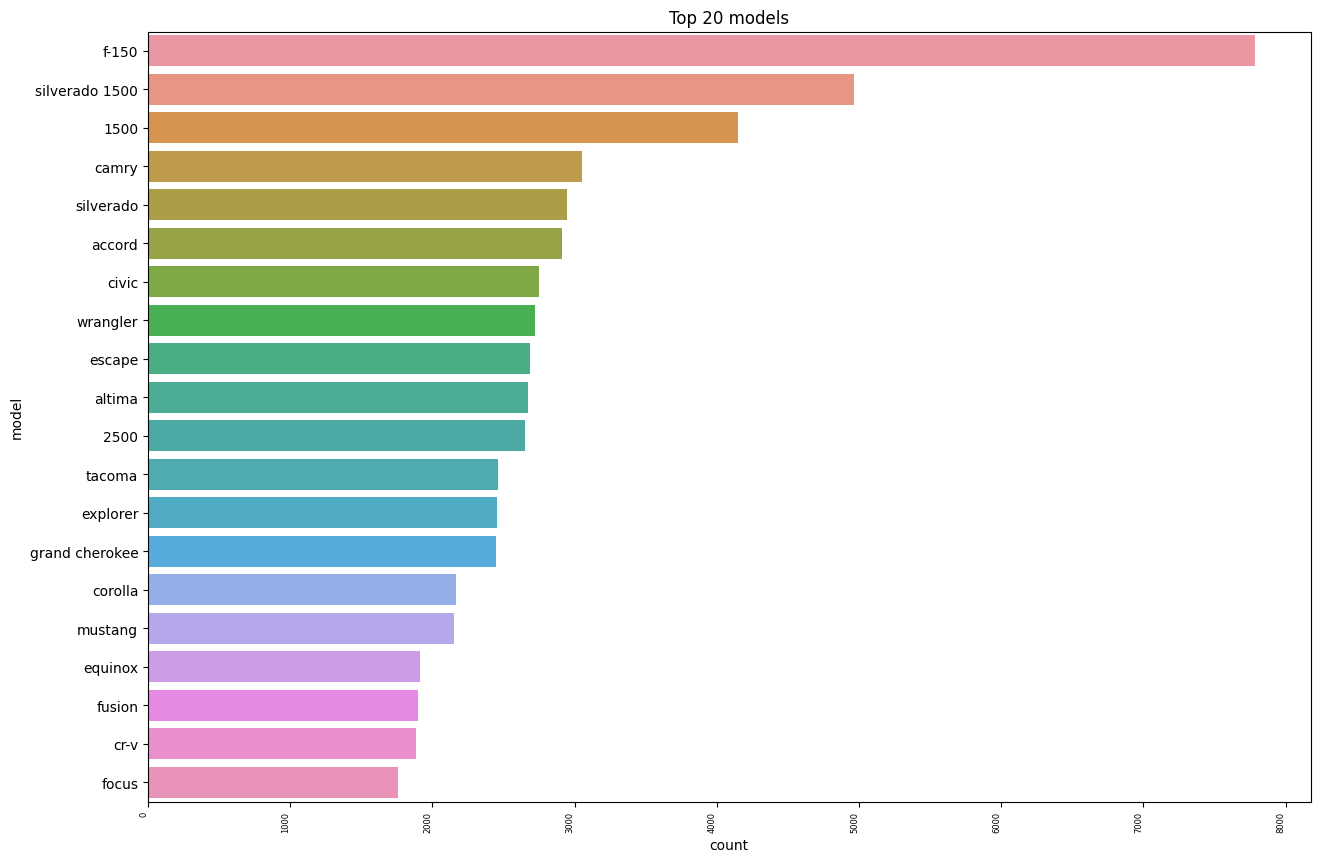

In [27]:
# plot for top 20 models
model_1 = df['model'].value_counts().iloc[:20]
model = pd.DataFrame({'model': model_1.index, 'count': model_1.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(y='model',x='count',data=model, order=model['model']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

# Set title
plt.title("Top 20 models")

f150 is the tp model  on craigslist.

/tmp/ipykernel_32/3863633803.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);


Text(0.5, 1.0, 'Top 20 states on craigslist')

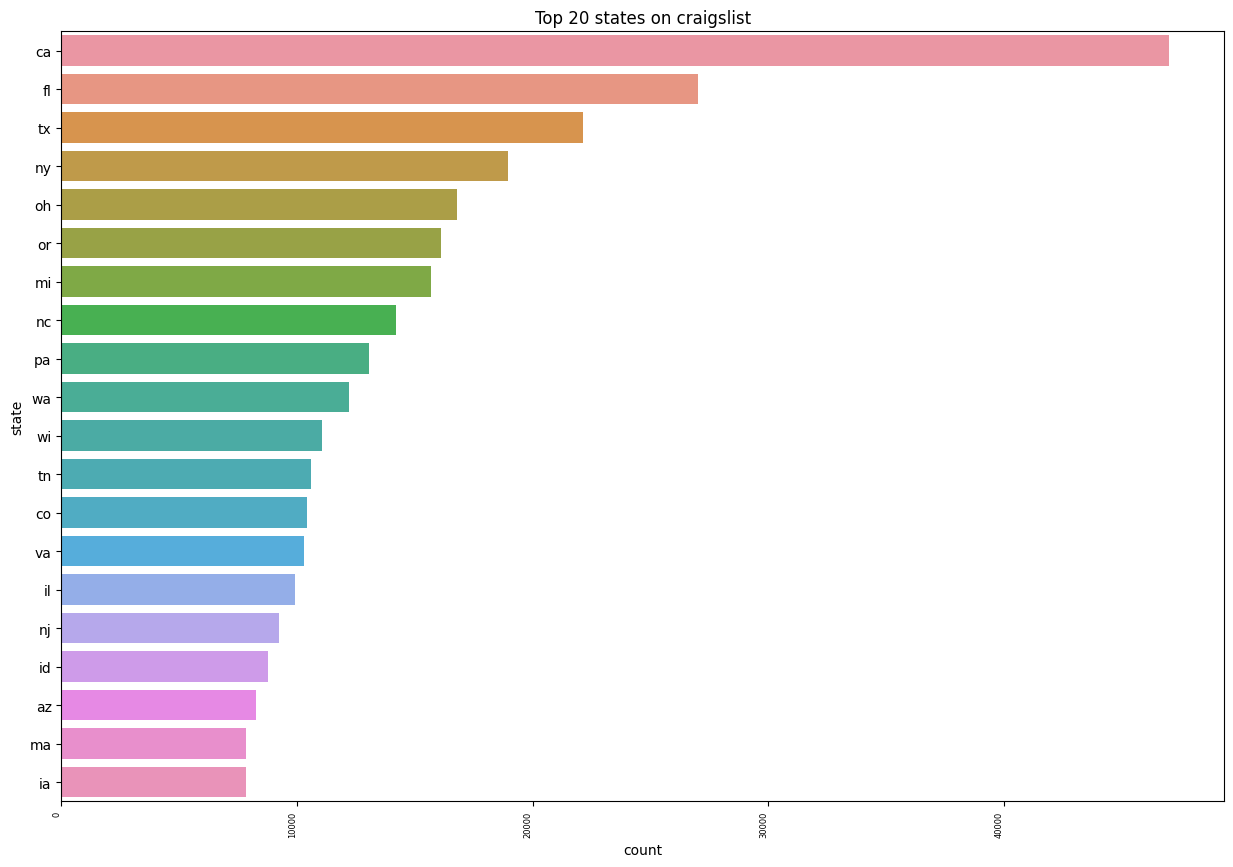

In [28]:
# plot for top 20 states on craigs list
state_1 = df['state'].value_counts().iloc[:20]
state = pd.DataFrame({'state': state_1.index, 'count': state_1.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(y='state',x='count',data=state, order=state['state']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

# Set title
plt.title("Top 20 states on craigslist")

Carlifornia has the most cars on craigslist

In [29]:
# sort the rows in from largest to smallest
new_df=df.sort_values(by=['price'], ascending=False).head()
new_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,paint_color,description,state,posting_date,removal_date
187096,7302445002,knoxville,3736928711,1999.0,toyota,4runner,fair,6 cylinders,gas,211000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,green,"99 four runner 211,000 miles runs great 4x4 wo...",tn,2021-04-06 00:00:00+00:00,2021-04-18 00:00:00+00:00
119481,7308056031,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,silver,Selling my 2007 Toyota Tundra SR5 four wheel d...,or,2021-04-17 00:00:00+00:00,2021-05-12 00:00:00+00:00
360503,7309735768,south jersey,3024942282,2000.0,mercedes-benz,benz s430,good,6 cylinders,gas,100000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,white,Text Jason 3024942282 All Mercedes wanted an...,nj,2021-04-20 00:00:00+00:00,2021-05-18 00:00:00+00:00
97278,7309730903,delaware,3024942282,2000.0,mercedes-benz,benz e320,good,6 cylinders,gas,100000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,white,"Any year,any condition ! Text Jason 3024942282...",de,2021-04-20 00:00:00+00:00,2021-05-02 00:00:00+00:00
133710,7304345156,frederick,1410065407,1989.0,jeep,wrangler,good,6 cylinders,diesel,103000.0,clean,manual,1FMJU1JT1HEA52352,4wd,white,TRADES ONLY TRUCK OR WHAT DO YOU GOT? This ...,md,2021-04-09 00:00:00+00:00,2021-04-19 00:00:00+00:00


**Bi and multivariate plots**

Text(0.5, 1.0, 'Most expesnive models')

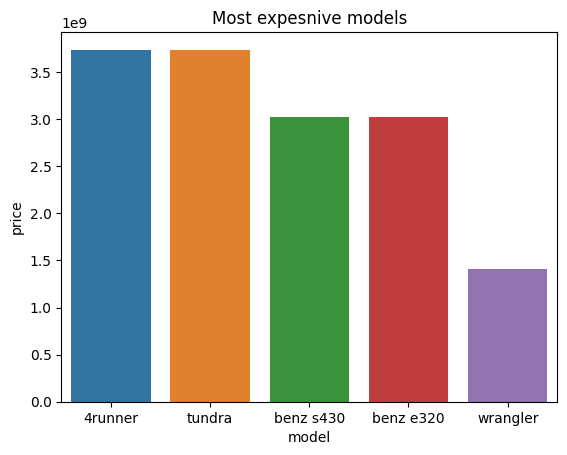

In [30]:
# plotting top models against price 
ax = sns.barplot(x="model",y="price",data=new_df) 
# Set title 
plt.title("Most expesnive models") 

4runner is the most expensive model

Text(0.5, 1.0, 'Manufacturers with Most Expenspensive cars')

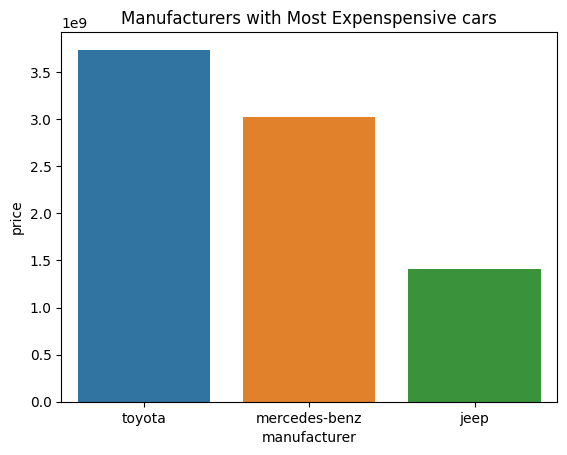

In [31]:
# ploting manufacturer against price
ax = sns.barplot(x="manufacturer",y="price",data=new_df) 
# Set title 
plt.title("Manufacturers with Most Expenspensive cars") 

Toyota is the most expensive manufacturer on craiglist

Text(0.5, 1.0, 'Most Expensive between manual and automatic')

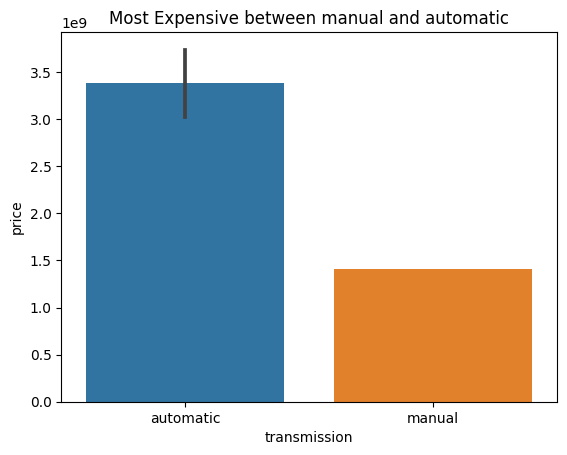

In [32]:
# plotting transmission against price
ax = sns.barplot(x="transmission",y="price",data=new_df) 
# Set title 
plt.title("Most Expensive between manual and automatic") 

Automatic seems to be the most expensive

Text(0.5, 1.0, 'Between gas and fuel car which fetch the most amount')

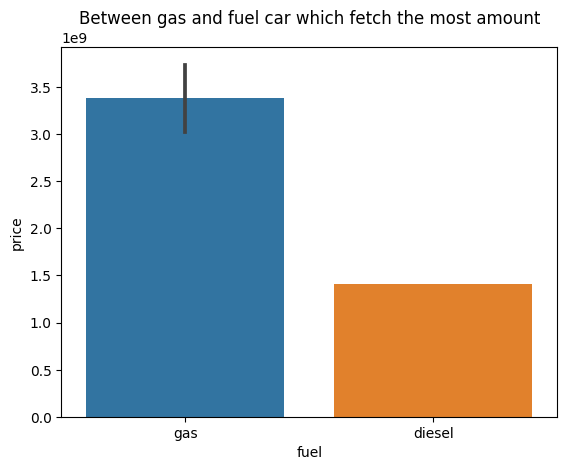

In [33]:
# plotting fuel agaisnt price
ax = sns.barplot(x="fuel",y="price",data=new_df) 
# Set title 
plt.title("Between gas and fuel car which fetch the most amount") 

gas cars are more expensive

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price against model and manufacturer')

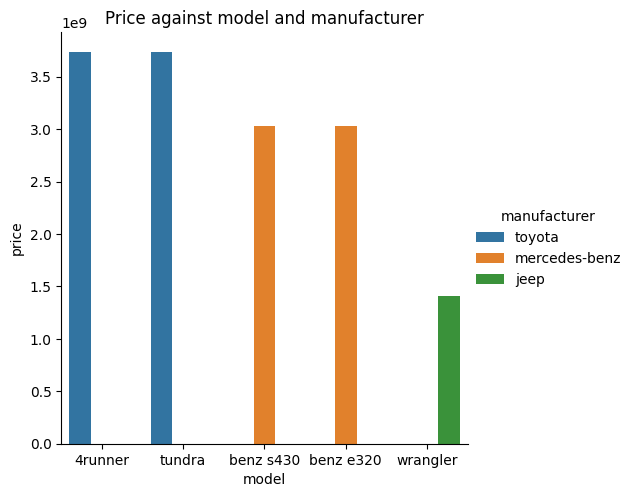

In [34]:
# plotting ptice againstmodel and manufacturer
sns.catplot(data=new_df, x="model", y="price", hue="manufacturer", kind="bar")
# Set title 
plt.title("Price against model and manufacturer")

Toyota 4 runner has the most price

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price against model and transmission')

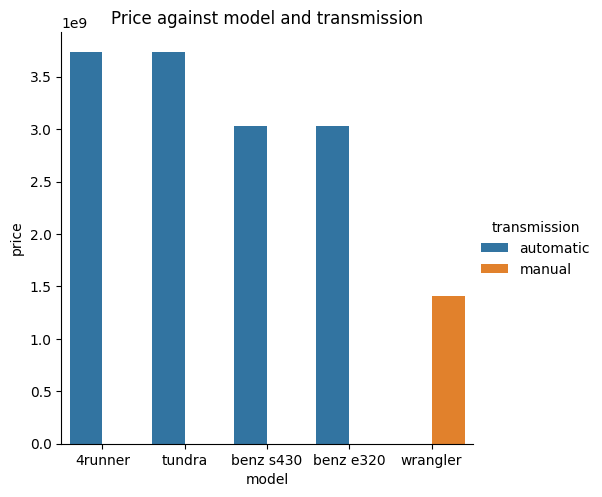

In [35]:
# plotting price against model and transmission
sns.catplot(data=new_df, x="model", y="price", hue="transmission", kind="bar")
# Set title 
plt.title("Price against model and transmission")

Automatic 4runner has the most price

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price against model and fuel')

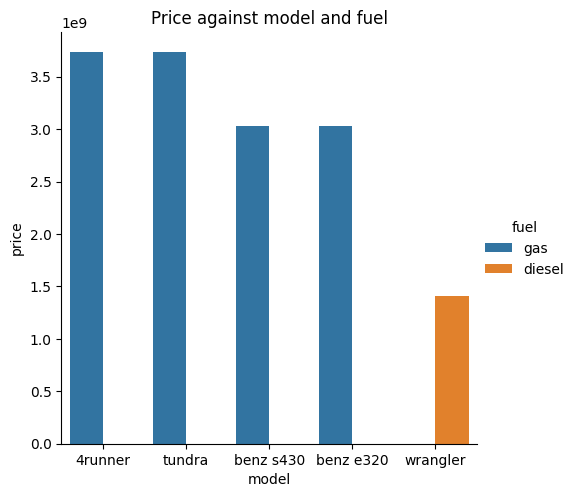

In [36]:
# plotting price against fuel and model
sns.catplot(data=new_df, x="model", y="price", hue="fuel", kind="bar")
# Set title 
plt.title("Price against model and fuel")

Gas using 4runner has the most price

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price against model and title status')

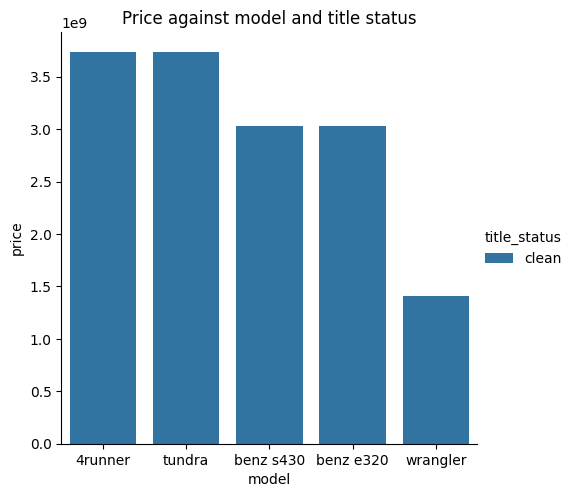

In [37]:
# plotting price agaisnt model and title status
sns.catplot(data=new_df, x="model", y="price", hue="title_status", kind="bar")
# Set title 
plt.title("Price against model and title status")

4 runners are clean 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price against model and title drive')

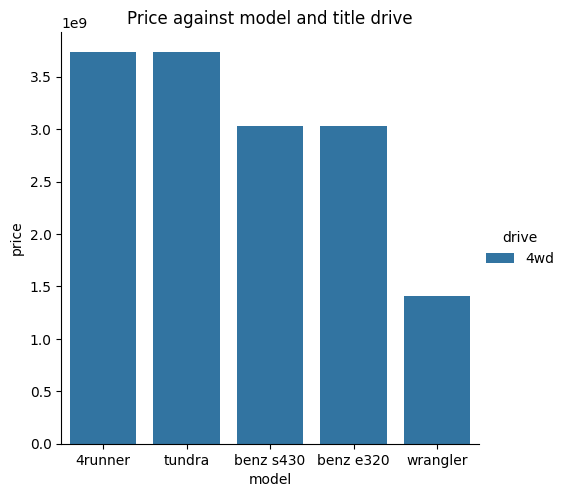

In [38]:
# plotting price against model and drive
sns.catplot(data=new_df, x="model", y="price", hue="drive", kind="bar")
# Set title 
plt.title("Price against model and title drive")

models with the highest price are 4wd

**Creating a time Series Analysis Model**
 Here we're going to predicting future values based on historical observations or past data.
 Our objective:Forecasting how region and model affects price.

In [39]:
# drop the rows we're not using
drop_column = ['id','year','state','description','removal_date','VIN','manufacturer','paint_color','condition','cylinders','fuel','odometer','title_status','transmission','drive']
new_df = new_df.drop(columns=drop_column)
new_df.head()

,region,price,model,posting_date
187096,knoxville,3736928711,4runner,2021-04-06 00:00:00+00:00
119481,eugene,3736928711,tundra,2021-04-17 00:00:00+00:00
360503,south jersey,3024942282,benz s430,2021-04-20 00:00:00+00:00
97278,delaware,3024942282,benz e320,2021-04-20 00:00:00+00:00
133710,frederick,1410065407,wrangler,2021-04-09 00:00:00+00:00


In [40]:
# indexing posting date
from datetime import datetime, date 

new_df['posting_date'] = pd.to_datetime(new_df['posting_date'], format = '%d/%m/%Y')
new_df.head().style.set_properties(subset=['posting_date'], **{'background-color': 'dodgerblue'})

,region,price,model,posting_date
187096,knoxville,3736928711,4runner,2021-04-06 00:00:00+00:00
119481,eugene,3736928711,tundra,2021-04-17 00:00:00+00:00
360503,south jersey,3024942282,benz s430,2021-04-20 00:00:00+00:00
97278,delaware,3024942282,benz e320,2021-04-20 00:00:00+00:00
133710,frederick,1410065407,wrangler,2021-04-09 00:00:00+00:00


In [41]:
# getting minimum and maximumtimestamps
new_df['posting_date'].min(), new_df['posting_date'].max()

(Timestamp('2021-04-06 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-20 00:00:00+0000', tz='UTC'))

In [42]:
# getting the difference between the maximum and minimum timestamps
new_df['posting_date'].max() - new_df['posting_date'].min()

Timedelta('14 days 00:00:00')

In [43]:
# parsing delta
new_df = new_df.sort_values(by='posting_date')

# Check time intervals
new_df['delta'] = new_df['posting_date'] - new_df['posting_date'].shift(1)

new_df[['posting_date', 'delta']].head()

,posting_date,delta
187096,2021-04-06 00:00:00+00:00,NaT
133710,2021-04-09 00:00:00+00:00,3 days
119481,2021-04-17 00:00:00+00:00,8 days
360503,2021-04-20 00:00:00+00:00,3 days
97278,2021-04-20 00:00:00+00:00,0 days


In [44]:
# adding features to the timeseries data
df_feat = pd.DataFrame({"year": new_df['posting_date'].dt.year,
                          "month": new_df['posting_date'].dt.month,
                          "day": new_df['posting_date'].dt.day,
                          "dayofyear": new_df['posting_date'].dt.dayofyear,
                          "weekday": new_df['posting_date'].dt.dayofweek,
                          "quarter": new_df['posting_date'].dt.quarter,
                         })
df_feat.head()

,year,month,day,dayofyear,weekday,quarter
187096,2021,4,6,96,1,2
133710,2021,4,9,99,4,2
119481,2021,4,17,107,5,2
360503,2021,4,20,110,1,2
97278,2021,4,20,110,1,2


In [45]:
# combining the dataframe with necessary column
comp_df = pd.concat([df_feat, new_df['price']], axis=1)
comp_df.head()

,year,month,day,dayofyear,weekday,quarter,price
187096,2021,4,6,96,1,2,3736928711
133710,2021,4,9,99,4,2,1410065407
119481,2021,4,17,107,5,2,3736928711
360503,2021,4,20,110,1,2,3024942282
97278,2021,4,20,110,1,2,3024942282


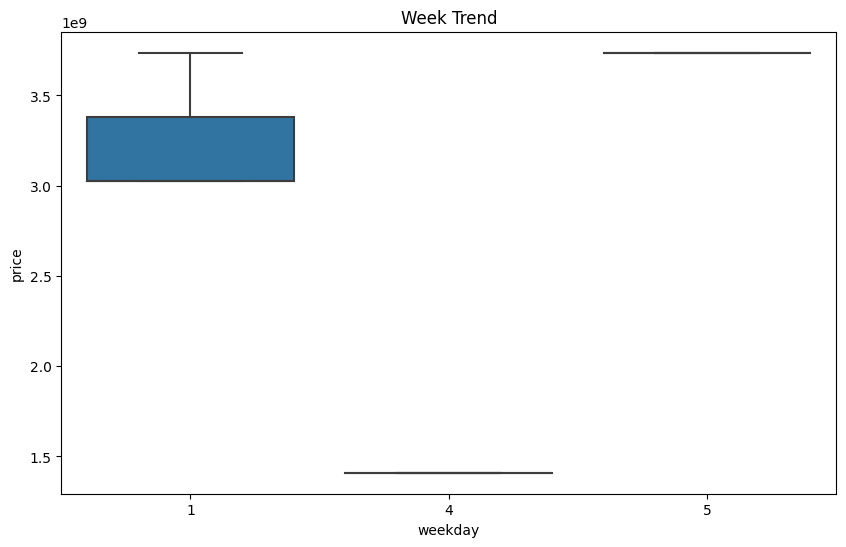

In [46]:
# boxplot for week's count
plt.figure(figsize=(10,6))
sns.boxplot(x=comp_df['weekday'], y=comp_df['price'], )
plt.title('Week Trend')
plt.show()

Average Prices are higher beginning of the week and lower midweek and end of week.

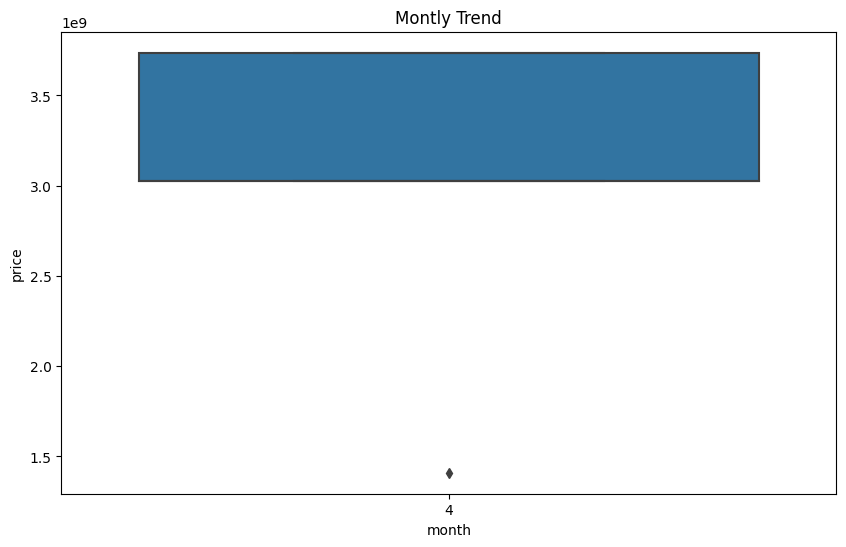

In [47]:
# boxplot for month's count
plt.figure(figsize=(10,6))
sns.boxplot(x=comp_df['month'], y=comp_df['price'], )
plt.title('Montly Trend')
plt.show()

The fourth month has a high average price

In [48]:
#check the average for each quarter.
quarter_average = pd.DataFrame(comp_df.groupby('quarter')['price'].mean())
quarter_average

,price
quarter,
2,2.986761e+09


<Axes: xlabel='year'>

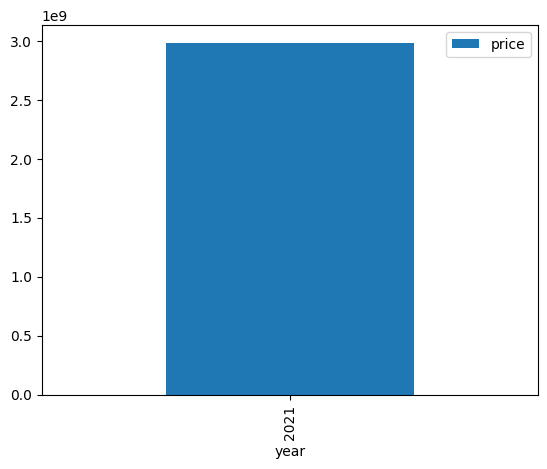

In [49]:
#plot the grapg
yearly_average = pd.DataFrame(comp_df.groupby('year')['price'].mean())
yearly_average
yearly_average.plot(kind='bar')

The year 2021 seems to have a high average

We're going to perform time series cross validation on our dataframe.I was having problems with hot encoding of the original data frame so i decided to do segmenting and picked Canada which has the highest frequency on craigslist.Most of the relevant datatypes are of object type so i fisrt had to do count encoding and  also perfomed dimensionality deduction using PCA for preprocessing.

In [50]:
# We'll take carlifornia and create a data frame from it since it has the  most purchases 

df1 = df[df.state == 'ca']
df1.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,paint_color,description,state,posting_date,removal_date
24570,7311155150,bakersfield,17500,2016.0,subaru,outback limited,good,6 cylinders,gas,101000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,white,2016 2016 Subaru Outback LimitedContact: Websi...,ca,2021-04-23 00:00:00+00:00,2021-05-10 00:00:00+00:00
24571,7315455595,bakersfield,13495,2008.0,ford,mustang,excellent,8 cylinders,gas,101314.0,clean,automatic,1ZVHT82H385180226,rwd,red,2008 *** Ford Mustang Coupe *** Ready To Up...,ca,2021-05-01 00:00:00+00:00,2021-05-25 00:00:00+00:00
24572,7310497737,bakersfield,26995,2008.0,ford,super duty f-350 srw,excellent,8 cylinders,diesel,89078.0,clean,automatic,1FTWW31R38ED35775,4wd,white,2008 *** Ford Super Duty F-350_ F350_ f350_ F ...,ca,2021-04-21 00:00:00+00:00,2021-04-26 00:00:00+00:00
24573,7315080346,bakersfield,43995,2015.0,ford,f-150,excellent,6 cylinders,gas,52582.0,clean,automatic,1FTEW1EG1FKD24846,4wd,grey,2015 *** Ford F-150_ F150_ f150_ F 150_ Pickup...,ca,2021-04-30 00:00:00+00:00,2021-06-09 00:00:00+00:00
24574,7304857183,bakersfield,68995,2017.0,ford,f-150,excellent,6 cylinders,gas,22098.0,clean,automatic,1FTFW1RG3HFC35726,4wd,silver,2017 *** Ford F-150_ F150_ f150_ F 150_ Raptor...,ca,2021-04-10 00:00:00+00:00,2021-04-30 00:00:00+00:00


In [51]:
df1.shape

(46992, 19)

In [52]:
preserve_column = df1[['id','year','state','region','VIN','description','posting_date','removal_date','model','manufacturer','paint_color']]
preserve_column

,id,year,state,region,VIN,description,posting_date,removal_date,model,manufacturer,paint_color
24570,7311155150,2016.0,ca,bakersfield,1FMJU1JT1HEA52352,2016 2016 Subaru Outback LimitedContact: Websi...,2021-04-23 00:00:00+00:00,2021-05-10 00:00:00+00:00,outback limited,subaru,white
24571,7315455595,2008.0,ca,bakersfield,1ZVHT82H385180226,2008 *** Ford Mustang Coupe *** Ready To Up...,2021-05-01 00:00:00+00:00,2021-05-25 00:00:00+00:00,mustang,ford,red
24572,7310497737,2008.0,ca,bakersfield,1FTWW31R38ED35775,2008 *** Ford Super Duty F-350_ F350_ f350_ F ...,2021-04-21 00:00:00+00:00,2021-04-26 00:00:00+00:00,super duty f-350 srw,ford,white
24573,7315080346,2015.0,ca,bakersfield,1FTEW1EG1FKD24846,2015 *** Ford F-150_ F150_ f150_ F 150_ Pickup...,2021-04-30 00:00:00+00:00,2021-06-09 00:00:00+00:00,f-150,ford,grey
24574,7304857183,2017.0,ca,bakersfield,1FTFW1RG3HFC35726,2017 *** Ford F-150_ F150_ f150_ F 150_ Raptor...,2021-04-10 00:00:00+00:00,2021-04-30 00:00:00+00:00,f-150,ford,silver
...,...,...,...,...,...,...,...,...,...,...,...
426227,7309647230,2007.0,ca,yuba-sutter,1FMJU1JT1HEA52352,2007 F250 Crew Cab Lariat 2wd 6.0 diesel has 2...,2021-04-20 00:00:00+00:00,2021-05-21 00:00:00+00:00,f250 super duty,ford,silver
426228,7311635991,2014.0,ca,yuba-sutter,1FMJU1JT1HEA52352,"2014 Dodge Dart GT. Loaded. Back up camera, na...",2021-04-23 00:00:00+00:00,2021-05-01 00:00:00+00:00,dart,dodge,silver
426229,7306444342,2018.0,ca,yuba-sutter,1FMJU1JT1HEA52352,2018 Mercedes Benz CLA 250 (Has only been serv...,2021-04-13 00:00:00+00:00,2021-04-24 00:00:00+00:00,benz cla 250,mercedes-benz,white
426230,7308841381,2014.0,ca,yuba-sutter,1FMJU1JT1HEA52352,Hello. I am selling my 2014 Toyota Prius with ...,2021-04-18 00:00:00+00:00,2021-05-06 00:00:00+00:00,prius,toyota,white


In [53]:
drop_column = ['id','year','state','region','description','posting_date','removal_date','VIN','model','manufacturer','paint_color']
df1 = df1.drop(columns=drop_column)
df1.head()

,price,condition,cylinders,fuel,odometer,title_status,transmission,drive
24570,17500,good,6 cylinders,gas,101000.0,clean,automatic,4wd
24571,13495,excellent,8 cylinders,gas,101314.0,clean,automatic,rwd
24572,26995,excellent,8 cylinders,diesel,89078.0,clean,automatic,4wd
24573,43995,excellent,6 cylinders,gas,52582.0,clean,automatic,4wd
24574,68995,excellent,6 cylinders,gas,22098.0,clean,automatic,4wd


In [54]:
# convert the categorical datatypes for encoding
df1["condition"] = df1["condition"].astype('category')
df1["cylinders"] = df1["cylinders"].astype('category')
df1["fuel"] = df1["fuel"].astype('category')
df1["title_status"] = df1["title_status"].astype('category')
df1["transmission"] = df1["transmission"].astype('category')
df1["drive"] = df1["drive"].astype('category')
df1.dtypes

price              int64
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
dtype: object

In [55]:
df1["condition"].value_counts()

condition
good         29034
excellent    14627
like new      2383
fair           725
new            123
salvage        100
Name: count, dtype: int64

**Count Encoding**
Count encoding is converting each categorical value to its frequency.

In [56]:
condition_count = df1['condition'].value_counts()
cylinders_count = df1['cylinders'].value_counts()
fuel_count = df1['fuel'].value_counts()
title_status_count = df1['title_status'].value_counts()
transmission_count = df1['transmission'].value_counts()
drive_count = df1['drive'].value_counts()

df1['condition_count_enc'] = df1['condition'].map(condition_count)
df1['cylinders_count_enc'] = df1['cylinders'].map(cylinders_count)
df1['fuel_count_enc'] = df1['fuel'].map(fuel_count)
df1['title_status_count_enc'] = df1['title_status'].map(title_status_count)
df1['transmission_count_enc'] = df1['transmission'].map(transmission_count)
df1['drive_count_enc'] = df1['drive'].map(drive_count)

df1.head()


,price,condition,cylinders,fuel,odometer,title_status,transmission,drive,condition_count_enc,cylinders_count_enc,fuel_count_enc,title_status_count_enc,transmission_count_enc,drive_count_enc
24570,17500,good,6 cylinders,gas,101000.0,clean,automatic,4wd,29034,28912,39342,45543,37376,24510
24571,13495,excellent,8 cylinders,gas,101314.0,clean,automatic,rwd,14627,7058,39342,45543,37376,8569
24572,26995,excellent,8 cylinders,diesel,89078.0,clean,automatic,4wd,14627,7058,3045,45543,37376,24510
24573,43995,excellent,6 cylinders,gas,52582.0,clean,automatic,4wd,14627,28912,39342,45543,37376,24510
24574,68995,excellent,6 cylinders,gas,22098.0,clean,automatic,4wd,14627,28912,39342,45543,37376,24510


In [57]:
df1 = df1.drop(['condition', 'cylinders','fuel', 'title_status','transmission','drive'], axis=1)
df1

,price,odometer,condition_count_enc,cylinders_count_enc,fuel_count_enc,title_status_count_enc,transmission_count_enc,drive_count_enc
24570,17500,101000.0,29034,28912,39342,45543,37376,24510
24571,13495,101314.0,14627,7058,39342,45543,37376,8569
24572,26995,89078.0,14627,7058,3045,45543,37376,24510
24573,43995,52582.0,14627,28912,39342,45543,37376,24510
24574,68995,22098.0,14627,28912,39342,45543,37376,24510
...,...,...,...,...,...,...,...,...
426227,15000,235000.0,29034,7058,3045,45543,37376,8569
426228,9000,106000.0,29034,10407,39342,45543,37376,13913
426229,27000,37722.0,14627,10407,39342,45543,37376,13913
426230,10800,50100.0,14627,10407,1013,1044,37376,24510


**We're going to perform dimensionality reduction to reduce time while running the model**

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df1)

In [60]:
# Apply PCA
n_components = 2  # Set the number of components you want to reduce to
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_standardized)

In [61]:
# Create a DataFrame with reduced dimensions
column_names = [f'PC{i+1}' for i in range(n_components)]
reduced_data = pd.DataFrame(data=data_pca, columns=column_names)

In [62]:
# Concatenate the reduced data with other relevant columns if needed: Example below concatenates 'PurchaseDate' and 'Location'

# Concatenate the reduced data with the columns you want to preserve
final_data = pd.concat([preserve_column, reduced_data], axis=1)

# Save the reduced data to a new CSV file
final_data.to_csv('/kaggle/working/reduced_dataset.csv', index=False)

In [63]:
df2 = pd.read_csv("/kaggle/working/reduced_dataset.csv")
df2.head()

/tmp/ipykernel_32/3649888936.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/kaggle/working/reduced_dataset.csv")


,id,year,state,region,VIN,description,posting_date,removal_date,model,manufacturer,paint_color,PC1,PC2
0,7.311155e+09,2016.0,ca,bakersfield,1FMJU1JT1HEA52352,2016 2016 Subaru Outback LimitedContact: Websi...,2021-04-23 00:00:00+00:00,2021-05-10 00:00:00+00:00,outback limited,subaru,white,0.717283,-0.058727
1,7.315456e+09,2008.0,ca,bakersfield,1ZVHT82H385180226,2008 *** Ford Mustang Coupe *** Ready To Up...,2021-05-01 00:00:00+00:00,2021-05-25 00:00:00+00:00,mustang,ford,red,0.707317,-0.089095
2,7.310498e+09,2008.0,ca,bakersfield,1FTWW31R38ED35775,2008 *** Ford Super Duty F-350_ F350_ f350_ F ...,2021-04-21 00:00:00+00:00,2021-04-26 00:00:00+00:00,super duty f-350 srw,ford,white,1.265136,0.164303
3,7.315080e+09,2015.0,ca,bakersfield,1FTEW1EG1FKD24846,2015 *** Ford F-150_ F150_ f150_ F 150_ Pickup...,2021-04-30 00:00:00+00:00,2021-06-09 00:00:00+00:00,f-150,ford,grey,0.924976,-0.537025
4,7.304857e+09,2017.0,ca,bakersfield,1FTFW1RG3HFC35726,2017 *** Ford F-150_ F150_ f150_ F 150_ Raptor...,2021-04-10 00:00:00+00:00,2021-04-30 00:00:00+00:00,f-150,ford,silver,0.892626,-0.635511


In [64]:
df2.dtypes

id              float64
year            float64
state            object
region           object
VIN              object
description      object
posting_date     object
removal_date     object
model            object
manufacturer     object
paint_color      object
PC1             float64
PC2             float64
dtype: object

In [65]:
from sklearn import decomposition
from sklearn.decomposition import PCA

Text(0, 0.5, 'Second Principal Component')

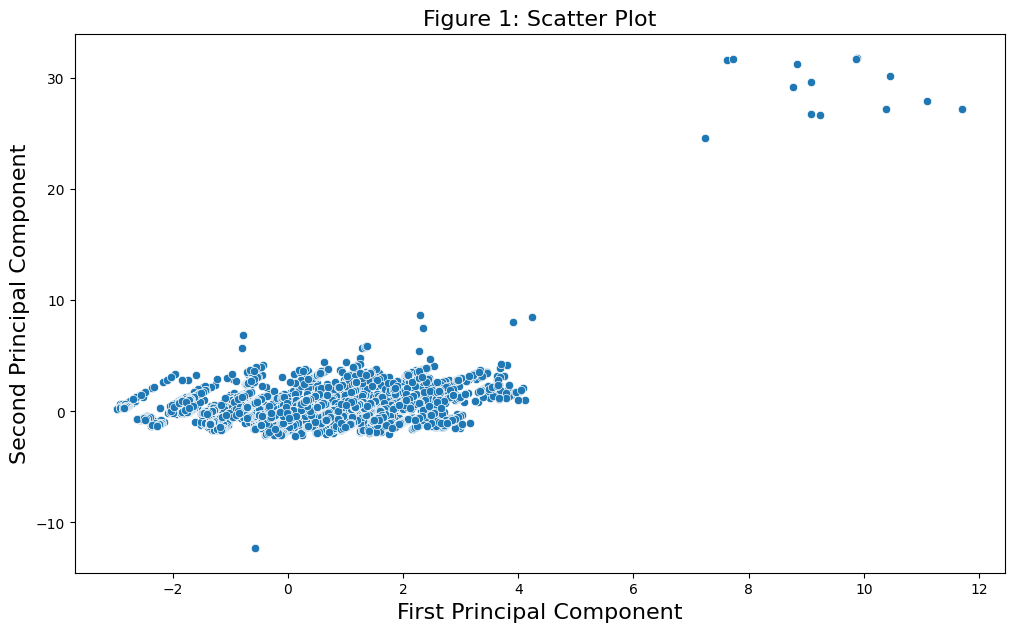

In [66]:
#plotting the PCA values in the dataframe
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=df2, 
                x="PC1", 
                y="PC2")
 
plt.title("Figure 1: Scatter Plot",
          fontsize=16)
plt.xlabel('First Principal Component',
           fontsize=16)
plt.ylabel('Second Principal Component',
           fontsize=16)


**Time series crossvalidation**
Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points.

In [67]:
from sklearn.model_selection import TimeSeriesSplit
time_series_cv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in time_series_cv.split(df2):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])

----- ----- ----
TRAIN: 0 to 15271
TEST: 15272 to 30538
----- ----- ----
TRAIN: 0 to 30538
TEST: 30539 to 45805
----- ----- ----
TRAIN: 0 to 45805
TEST: 45806 to 61072
----- ----- ----
TRAIN: 0 to 61072
TEST: 61073 to 76339
----- ----- ----
TRAIN: 0 to 76339
TEST: 76340 to 91606


Conclusion
Time series analysis is an important topic of data science for any organization. It aids in comprehending seasonality, trends, cyclicality, randomness, and other aspects and distribution. These factors help organisations make informed decisions.